<a href="https://colab.research.google.com/github/sivacharan93/DL-A3/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Installing and importing required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
plt.style.use('default')
from tensorflow.contrib import rnn

import pickle
#!pip install librosa 
import librosa


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

Text(0.5, 1.0, 'Convergence')

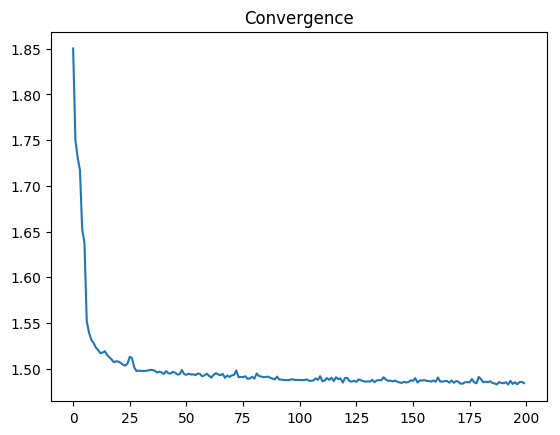

In [0]:
#Question 1
#Loading the data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

#stroring them seperately
x_train,y_train,x_valid,y_valid,x_test,y_test = mnist.train.images,\
                                  mnist.train.labels, mnist.validation.images,\
                                  mnist.validation.labels,mnist.test.images,\
                                  mnist.test.labels

#next_batch
def next_batch(x,y,start,batch_size):
    return x[start:start + batch_size],y[start:start + batch_size]
                                  
#Network Parameters
n_input = x_train.shape[1]     #784 pixels                             
n_classes = y_train.shape[1]   #10 classes                           
hidden_units = 1024

#Defining hyperparamters
batch_size = 500
n_epoch = 200
display_f = 10
learning_rate = 0.0001

#Calc number of iterations in each epoch
n_iter = len(x_train)//batch_size
                                  
#layer function
def layer(x,hidden_units,name,relu_flag=True):
  input_dim = int(x.get_shape()[1])
  #init = tf.truncated_normal([input_dim,hidden_units],stddev=0.01)  
  w = tf.get_variable('w_' + name,dtype=tf.float32,initializer=\
                      tf.truncated_normal([input_dim,hidden_units],stddev=0.01))
  b = tf.get_variable('b_' + name,dtype=tf.float32,\
                      initializer=tf.constant(0., shape=[hidden_units], dtype=tf.float32))
  if relu_flag ==True:
     return tf.nn.relu(x@w+b),w,b
  else:
     return tf.nn.softmax(x@w+b),w,b
  
#Creating the graph
tf.reset_default_graph()
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

layer_1,w_1,b_1 = layer(x,hidden_units,'layer_1',True)
layer_2,w_2,b_2 = layer(layer_1,hidden_units,'layer_2',True)
layer_3,w_3,b_3 = layer(layer_2,hidden_units,'layer_3',True)
layer_4,w_4,b_4 = layer(layer_3,hidden_units,'layer_4',True)
layer_5,w_5,b_5 = layer(layer_4,hidden_units,'layer_5',True)
layer_out,w_o,b_o = layer(layer_5,n_classes,'output',False)

#loss, optimizer & accuracy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,\
                                     logits=layer_out), name='loss')
train_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
correct_pred = tf.equal(tf.argmax(layer_out, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

saver = tf.train.Saver()

with tf.Session()  as sess:
  tf.global_variables_initializer().run()
  err = np.zeros(n_epoch)
  for epoch in range(n_epoch):
   # print('Epoch ', str(epoch))
#     print('_'*30)
    
    for itr in range(n_iter):
      
      
      x_batch,y_batch = next_batch(x_train,y_train,itr*batch_size,batch_size)

      sess.run(train_optimizer, feed_dict={x:x_batch,y:y_batch})
      
#       if itr%display_f == 0:
#         batch_loss, batch_accuracy = sess.run([loss,accuracy],feed_dict={x:x_batch,y:y_batch})
        
#         print("Iteration", str(itr), "\t| Batch Loss =", str(round(batch_loss,2)), "\t| Batch Accuracy =", str(round(batch_accuracy,2)))
    #Validation after each epoch
#     valid_loss, valid_accuracy = sess.run([loss,accuracy],feed_dict={x:x_valid,y:y_valid})
#     print('_'*30)      
#     print("Epoch", str(epoch), "\t| Validation Loss =", str(round(valid_loss,2)), "\t| Validation Accuracy =", str(round(valid_accuracy,2)))
#     print('_'*30)
    #Test loss and accuracy
    err[epoch], test_accuracy = sess.run([loss,accuracy],feed_dict={x:x_test,y:y_test})
  
    
    saver.save(sess, "Model_1")
    if epoch%display_f == 0:
      print("Epoch", str(epoch), "\t| Test Loss =", str(round(err[epoch],2)), "\t| Test Accuracy =", str(round(test_accuracy,2)))
  W_1,W_2,W_3,W_4,W_5,W_o,B_1,B_2,B_3,B_4,B_5,B_o = sess.run([w_1,w_2,w_3,w_4,\
  w_5,w_o,b_1,b_2,b_3,b_4,b_5,b_o],feed_dict={x:x_test,y:y_test})    
    
  #y_probs, y_indices = sess.run(tf.nn.top_k(layer_out, k=10), feed_dict={x:x_test[:1000],y:y_test[:1000]})
plt.figure()
plt.plot(err)
plt.title('Convergence')    


The model reaches the 98% accuracy at 160 epoch and then stabilizes. The hyperparameters are the following batch_size = 500 | n_epoch = 200 | learning_rate = 0.0001| hidden_units = 5 | n_layers = 5. Have used Adam optimizer with softmax cross entropy as the loss function. The weights are initialized using the truncated normal function with a standard deviation of 0.01. This make sures the numbers are small and close within 2 standard deviations of the mean.

D  10 	| Test Loss = 1.86 	| Test Accuracy = 0.6
D  20 	| Test Loss = 1.66 	| Test Accuracy = 0.8
D  50 	| Test Loss = 1.49 	| Test Accuracy = 0.97
D  100 	| Test Loss = 1.48 	| Test Accuracy = 0.98
D  200 	| Test Loss = 1.48 	| Test Accuracy = 0.98
D  1000 	| Test Loss = 1.48 	| Test Accuracy = 0.98


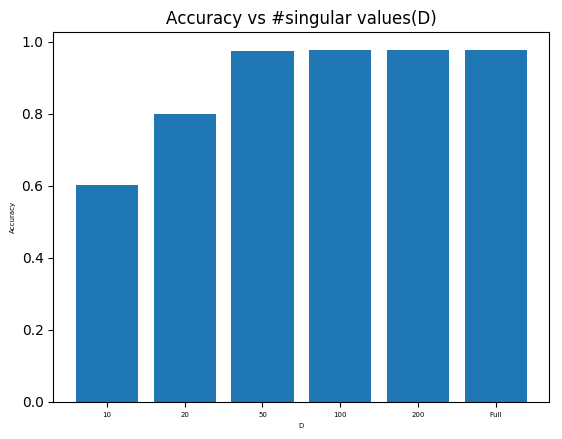

In [0]:
#1.5

def svd_slice(W,d):
  if d ==1000:
    tf_w_approx = []
    for i in range(0,5):
      s, u, v = tf.linalg.svd(W[i],full_matrices=False)
      tf_w_approx.append(tf.matmul(u, tf.matmul(tf.linalg.diag(s), v,adjoint_b=True)))
  else:  
    tf_w_approx = []
    for i in range(0,5):
      s, u, v = tf.linalg.svd(W[i],full_matrices=False)
      tf_w_approx.append(tf.matmul(u[:,0:d], tf.matmul(tf.linalg.diag(s[0:d]), v[:,0:d],adjoint_b=True)))
  return tf_w_approx

#layer function for wrapping
def layer(x,W,b,relu_flag=True):
  
  W = tf.Variable(W)
  b = tf.Variable(b)
  if relu_flag ==True:
     #print(x.shape,W.shape,b.shape)
    return tf.nn.relu(x@W+b)
  else:
    return tf.nn.softmax(x@W+b)
    
#Storing the weights in a list
W_i = [W_1,W_2,W_3,W_4,W_5]

B = [B_1,B_2,B_3,B_4,B_5,B_o]
tf.reset_default_graph() 

acc = []
#Feed forward for various D values
for i in [10,20,50,100,200,1000]:
  
  W_a = svd_slice(W_i,i)
  W_a.append(W_o)
  x = tf.placeholder(tf.float32,[None,784])
  y = tf.placeholder(tf.float32,[None,10])
  
  
  layer_1 = layer(x,W_a[0],B[0],True)
  layer_2 = layer(layer_1,W_a[1],B[1],True)
  layer_3 = layer(layer_2,W_a[2],B[2],True)
  layer_4 = layer(layer_3,W_a[3],B[3],True)
  layer_5 = layer(layer_4,W_a[4],B[4],True)
  layer_out = layer(layer_5,W_a[5],B[5],False)

  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,\
                                       logits=layer_out), name='loss')
  correct_pred = tf.equal(tf.argmax(layer_out, 1), tf.argmax(y, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

  with tf.Session()  as sess_1:
    tf.global_variables_initializer().run()
    loss_d,test_accuracy = sess_1.run([loss,accuracy],feed_dict={x:x_test,y:y_test})
    acc.append(test_accuracy)

    print("D ", str(i), "\t| Test Loss =", str(round(loss_d,2)), "\t| Test Accuracy =", str(round(test_accuracy,2)))


#Plotting the accuracy 
label = [10,20,50,100,200,'Full']

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, acc)
    plt.xlabel('D', fontsize=5)
    plt.ylabel('Accuracy', fontsize=5)
    plt.xticks(index, label, fontsize=5)
    plt.title('Accuracy vs #singular values(D)')
    plt.show()

#Call plot function  
plot_bar_x()
  

(784, 20) (20, 1024)
110
Epoch 0 	| Test Loss = 1.58 	| Test Accuracy = 0.88
Epoch 10 	| Test Loss = 1.55 	| Test Accuracy = 0.91
Epoch 20 	| Test Loss = 1.54 	| Test Accuracy = 0.92
Epoch 30 	| Test Loss = 1.54 	| Test Accuracy = 0.92
Epoch 40 	| Test Loss = 1.54 	| Test Accuracy = 0.92
Epoch 50 	| Test Loss = 1.55 	| Test Accuracy = 0.92
Epoch 60 	| Test Loss = 1.54 	| Test Accuracy = 0.92
Epoch 70 	| Test Loss = 1.54 	| Test Accuracy = 0.92
Epoch 80 	| Test Loss = 1.54 	| Test Accuracy = 0.92
Epoch 90 	| Test Loss = 1.54 	| Test Accuracy = 0.92


Text(0.5, 1.0, 'Convergence')

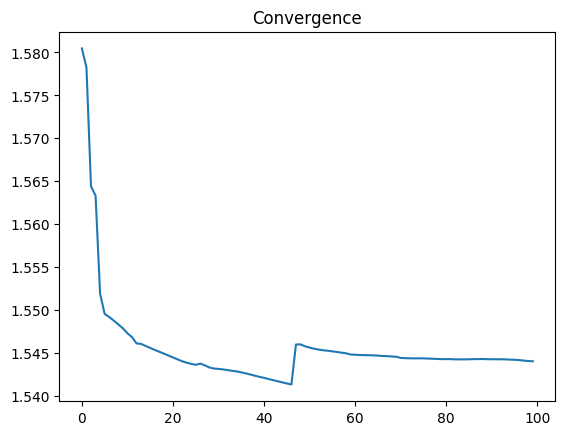

In [0]:
#1.6 a

def svd_slice(W,d):
    U=[]
    V=[]
    for i in range(len(W)):
      s, u, v = tf.linalg.svd(W[i],full_matrices=False)
       
      U.append(u[:,0:d])
      V.append(tf.matmul(tf.linalg.diag(s[0:d]), v[:,0:d],adjoint_b=True))
  
    return U,V

#Actual weights & biases from original training model  
W_i = [W_1,W_2,W_3,W_4,W_5,W_o]

B = [B_1,B_2,B_3,B_4,B_5,B_o]

tf.reset_default_graph()
#Setting D=20 and getting the initial weights
U,V = svd_slice(W_i,20)
print(U[0].shape,V[0].shape)


#next_batch
def next_batch(x,y,start,batch_size):
    return x[start:start + batch_size],y[start:start + batch_size]
                                  
#Network Parameters
n_input = x_train.shape[1]     #784 pixels                             
n_classes = y_train.shape[1]   #10 classes                           
hidden_units = 1024

#Defining hyperparamters
batch_size = 500
n_epoch = 100
display_f = 10
learning_rate = 0.00005

#Calc number of iterations in each epoch
n_iter = len(x_train)//batch_size
print(n_iter)
                                  
# #layer function
# def layer(x,u,v,b): 
#       u = tf.Variable(u,validate_shape=False)
#       v = tf.Variable(v,validate_shape=False)
      
#       b = tf.Variable(b,validate_shape=False)
#       return tf.nn.relu(x@u@v+b)
# def output_layer(x,w,b):
#       w = tf.Variable(w,validate_shape=False)
#       b = tf.Variable(b,validate_shape=False)
#       return tf.nn.softmax(x@w+b)
  
# #Creating the graph
# #tf.reset_default_graph()
inx = tf.placeholder(tf.float32,[None,784])
iny = tf.placeholder(tf.float32,[None,10])

# layer_1 = layer(inx,U[0],V[0],B[0])
# layer_2 = layer(layer_1,U[1],V[1],B[1])
# layer_3 = layer(layer_2,U[2],V[2],B[2])
# layer_4 = layer(layer_3,U[3],V[3],B[3])
# layer_5 = layer(layer_4,U[4],V[4],B[4])
# layer_out = output_layer(layer_5,W_i[5],B[5])

V_1 = tf.Variable(V[0], name = 'V_1')
U_1 = tf.Variable(U[0], name = 'U_1')
bi_1 = tf.Variable(B_1, name = 'bi_1')

V_2 = tf.Variable(V[1], name = 'V_2')
U_2 = tf.Variable(U[1], name = 'U_2')
bi_2 = tf.Variable(B_2, name = 'bi_2')

V_3 = tf.Variable(V[2], name = 'V_3')
U_3 = tf.Variable(U[2], name = 'U_3')
bi_3 = tf.Variable(B_3, name = 'bi_3')

V_4 = tf.Variable(V[3], name = 'V_4')
U_4 = tf.Variable(U[3], name = 'U_4')
bi_4 = tf.Variable(B_4, name = 'bi_4')

V_5 = tf.Variable(V[4], name = 'V_5')
U_5 = tf.Variable(U[4], name = 'U_5')
bi_5 = tf.Variable(B_5, name = 'bi_5')

W_O = tf.Variable(W_i[5], name = 'W_O')
bi_O = tf.Variable(B_o, name = 'bi_O')


L_1 = tf.nn.relu(tf.add(tf.matmul(inx,(tf.matmul(U_1,V_1))), bi_1))
L_2 = tf.nn.relu(tf.add(tf.matmul(L_1,(tf.matmul(U_2,V_2))), bi_2))
L_3 = tf.nn.relu(tf.add(tf.matmul(L_2,(tf.matmul(U_3,V_3))), bi_3))
L_4 = tf.nn.relu(tf.add(tf.matmul(L_3,(tf.matmul(U_4,V_4))), bi_4))
L_5 = tf.nn.relu(tf.add(tf.matmul(L_4,(tf.matmul(U_5,V_5))), bi_5))

layer_out = tf.nn.softmax(L_5@W_O +  bi_O)


#loss, optimizer & accuracy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=iny,\
                                     logits=layer_out), name='loss')
train_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
correct_pred = tf.equal(tf.argmax(layer_out, 1), tf.argmax(iny, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

saver = tf.train.Saver()

with tf.Session()  as sess_2:
  tf.global_variables_initializer().run()
  tf.variables_initializer(var_list=[U_1,V_1,bi_1,U_2,V_2,bi_2,U_3,V_3,bi_3,U_4,V_4,bi_4,U_5,V_5,bi_5,W_O,bi_O]).run()
  err = np.zeros(n_epoch)
  for epoch in range(n_epoch):
   # print('Epoch ', str(epoch))
#     print('_'*30)
    
    for itr in range(n_iter):
      sess_2.run(train_optimizer, feed_dict={inx:x_batch,iny:y_batch})   

    #Test loss and accuracy
    err[epoch], test_accuracy = sess_2.run([loss,accuracy],feed_dict={inx:x_test,iny:y_test})
    
    saver.save(sess_2, "Model_3")
    if epoch%display_f == 0:
      print("Epoch", str(epoch), "\t| Test Loss =", str(round(err[epoch],2)), "\t| Test Accuracy =", str(round(test_accuracy,2)))
    
    
  #y_probs, y_indices = sess.run(tf.nn.top_k(layer_out, k=10), feed_dict={x:x_test[:1000],y:y_test[:1000]})
plt.figure()
plt.plot(err)
plt.title('Convergence')




The finetuning process improves the test accuracy from 80% to 92%.

In [0]:
#Question 2
import glob
from google.colab import drive
import librosa
#mount drive
drive.mount('/content/gdrive/')
#Unzip the contents
!unzip /content/gdrive/'My Drive'/Assignment_3/homework3.zip

#!ls timit-homework/
#Path for files
train_path = 'timit-homework/tr/'
val_path = 'timit-homework/v/'
test_path = 'timit-homework/te/'

#Function to covert audio files to stft
def input_array(path,name):
  out = {'train_p':[],'train_a':[],
          'clean_p':[],'clean_a':[],
          'noise_p':[],'noise_a':[]}
  for file in sorted(glob.iglob(path +name +'x*.wav')):
    #print (type(file))
    sn, sr=librosa.load(file, sr=None)
    X=librosa.stft(sn, n_fft=1024, hop_length=512)
    #print(sn,X)
    out['train_p'].append(sn)
    out['train_a'].append(X)
  for file in sorted(glob.iglob(path + name +'s*.wav')):
    sn, sr=librosa.load(file, sr=None)
    X=librosa.stft(sn, n_fft=1024, hop_length=512)
    out['clean_p'].append(sn)
    out['clean_a'].append(X)
  for file in sorted(glob.iglob(path + name +'n*.wav')):
    sn, sr=librosa.load(file, sr=None)
    X=librosa.stft(sn, n_fft=1024, hop_length=512)
    out['noise_a'].append(X)
  return out

#Converting train and validation files to stft
train = input_array(train_path,'tr')
#test = input_array(test_path,'te')
val = input_array(val_path,'v')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
Archive:  /content/gdrive/My Drive/Assignment_3/homework3.zip
   creating: timit-homework/
   creating: timit-homework/te/
  inflating: timit-homework/te/tex0083.wav  
  inflating: timit-homework/te/tex0097.wav  
  inflating: timit-homework/te/tex0040.wav  
  inflating: timit-homework/te/tex0054.wav  
  inflating: timit-homework/te/tex0068.wav  
  inflating: timit-homework/te/tex0281.wav  
  inflating: timit-homework/te/tex0295.wav  
  inflating: timit-homework/te/tex0242.wav  
  inflating: timit-homework/te/tex0256.wav  
  inflating: timit-homework/te/tex0336.wav  
  inflating: timit-homework/te/tex0322.wav  
  inflating: timit-homework/te/tex0134.wav  
  inflating: timit-homework/te/tex0120.wav  
  inflating: timit-homework/te/tex0108.wav  
  inflating: timit-homework/te/tex0109.wav  
  inflating: timit-homework/te/tex0121.wav  
  inflating: timit-homew

In [0]:
#Write the spectogram information into pickle files
import pickle

path ='/content/gdrive/My Drive/Assignment_3/'  

output = open(path+'train.pkl', 'wb')
pickle.dump(train,output)

# output = open(path+'test.pkl', 'wb')
# pickle.dump(test,output)

output = open(path+'val.pkl', 'wb')
pickle.dump(val,output)


In [0]:
#Load pickle files from gdrive

from google.colab import drive
drive.mount('/content/gdrive/')


path ='/content/gdrive/My Drive/Assignment_3/'
f = open(path + 'train.pkl','rb') 
train = pickle.load(f)


f = open(path + 'val.pkl','rb') 
val = pickle.load(f)

# f = open(path + 'test.pkl','rb') 
# test = pickle.load(f)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
#ibm mask function

def ibm(file):
  mask = []
  for i in range(len(file['clean_a'])):
    comp = np.where(np.abs(file['clean_a'][i]) > np.abs(file['noise_a'][i]),1,0)
    mask.append(comp)
  return mask

#Training and validation mask files
train_mask = ibm(train)
val_mask = ibm(val)

    
    

In [0]:
#train data input
x_train = [np.abs(i).T for i in train['train_a']]
x_train_len = [i.shape[0] for i in x_train]
y_train = [i.T for i in train_mask]
x_train_s = train['train_p']

#val data input
x_val = [np.abs(i).T for i in val['train_a']]
x_val_len = [i.shape[0] for i in x_val]
y_val = [i.T for i in val_mask]        

137
138
139
140
Epoch 140 	| Batch Loss = 0.109
141
142
143
144
145
146
147
148
149
150
Epoch 150 	| Batch Loss = 0.109
151
152
153
154
155
156
157
158
159
160
Epoch 160 	| Batch Loss = 0.109
161
162
163
164
165
166
167
168
169
170
Epoch 170 	| Batch Loss = 0.107
171
172
173
174
175
176
177
178
179
180
Epoch 180 	| Batch Loss = 0.107
181
182
183
184
185
186
187
188
189
190
Epoch 190 	| Batch Loss = 0.107
191
192
193
194
195
196
197
198
199


Text(0.5, 1.0, 'Convergence')

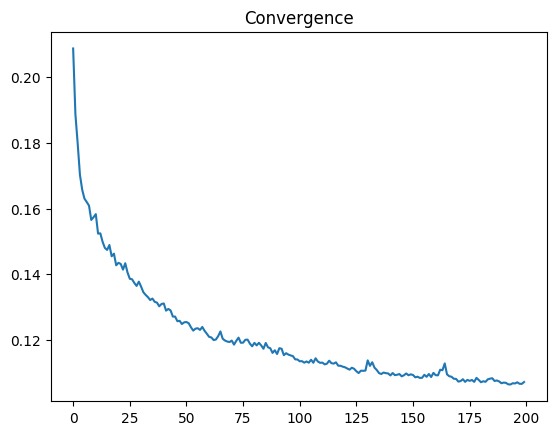

In [0]:
# Question_2 
#LSTM


#next_batch
def next_batch(x,y,seq,start,batch_size):
    return np.array(x[start:start + batch_size]),np.array(y[start:start + batch_size]),np.array(seq[start:start + batch_size])
  

                                
#Network Parameters
n_classes = 513                             
hidden_units = 128

#Defining hyperparamters
batch_size = 10
n_epoch = 200
display_f = 10
learning_rate = 0.001
dropout = 0.1

#Calc number of iterations in each epoch
n_iter = len(x_train)//batch_size

#layer function
def rnn_layer(x,seq_len,hidden_units):   
    output, _ = tf.nn.dynamic_rnn(tf.nn.rnn_cell.DropoutWrapper(tf.contrib.rnn.LSTMCell(hidden_units, 
                                                         initializer =tf.contrib.layers.variance_scaling_initializer()),
                                                                output_keep_prob = 1 - dropout), 
                                  x, dtype=tf.float32, sequence_length=seq_len)
    return output
  
 
    
#Construct the graph
tf.reset_default_graph()
x = tf.placeholder(tf.float32,[None,None,513])
y = tf.placeholder(tf.float32,[None,None,513])
seq_len = tf.placeholder(tf.int32,None)
#RNN layer 1
rnn_layer_1 = rnn_layer(x,seq_len,hidden_units)

#Dense layer
layer_out = tf.layers.dense(rnn_layer_1, n_classes, kernel_initializer= tf.contrib.layers.variance_scaling_initializer(),activation=tf.sigmoid)




#Loss and optimizer
loss = tf.reduce_mean(tf.losses.mean_squared_error(y,layer_out))
train_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
    
#Saving the session
saver = tf.train.Saver()

#Running the session
with tf.Session()  as sess:
  err = np.zeros(n_epoch)
  tf.global_variables_initializer().run() 
  tf.local_variables_initializer().run()
  for epoch in range(n_epoch):
    
    for itr in range(n_iter):    
      
      x_batch,y_batch,seq_batch = next_batch(x_train,y_train,x_train_len,itr*batch_size,batch_size)
      _,err[epoch] = sess.run([train_optimizer,loss], feed_dict={x:x_batch,y:y_batch,seq_len:seq_batch})
    
    saver.save(sess, "Model_2")

    #Pring the batch Loss  for each epoch
    if epoch%display_f == 0:      
      print("Epoch", str(epoch), "\t| Batch Loss =", str(round(err[epoch],3)))
    
#plotting convergence    
plt.figure()
plt.plot(err)
plt.title('Convergence')                                  



In [0]:
#Calculating SNR for train data
with tf.Session() as sess:
  saver.restore(sess, "Model_2")

  out = []
  for i in range(len(x_train)): 
      out.append(sess.run(layer_out, feed_dict={x:x_train[i].\
                    reshape(1,x_train[i].shape[0],x_train[i].shape[1]),\
                    y:y_train[i].reshape(1,y_train[i].shape[0],y_train[i].shape[1]),\
                    seq_len:x_train_len[i]}))
#Transposing and reshaping the output
train_out = [i.reshape(i.shape[1],i.shape[2]).T for i in out]

#Loading the stft for train files
x_train_stft = train['train_a']
  
#SNR function
def snr(x,s,p):
  #_,phase = librosa.magphase(x)  
  p=librosa.istft(p*x, hop_length=512,length=len(s))
  a = np.matmul(np.transpose(s),s)
  b = np.matmul(np.transpose(s-p),s-p)
  return 10*np.log10(a/b)

#Train SNR
#Clean signal stft
train_clean = train['clean_p']

#Calculating SNR for all train inputs and storing them in a list
snr_train =  [snr(x_train_stft[i],train_clean[i],train_out[i]) for i in range(len(x_train)) ]
print("The Average SNR for train is "+ str(sum(snr_train)/len(snr_train)))
  


INFO:tensorflow:Restoring parameters from Model_2
The Average SNR for train is 10.943535578747591


In [0]:
#Calculating SNR for val data
with tf.Session() as sess:
  saver.restore(sess, "Model_2")

  out = []
  loss_val = []
  for i in range(len(x_val)): 
    net_out,net_loss sess.run([layer_out,loss], feed_dict={x:x_val[i].\
                    reshape(1,x_val[i].shape[0],x_val[i].shape[1]),\
                    y:y_val[i].reshape(1,y_val[i].shape[0],y_val[i].shape[1]),\
                    seq_len:x_val_len[i]})
     
    out.append(net_out)
    loss_val.append(net_loss)
#Transposing and reshaping the output
val_out = [i.reshape(i.shape[1],i.shape[2]).T for i in out]

#Loading the stft for val files
x_val_stft = val['train_a']
  
#SNR function
def snr(x,s,p):
  #_,phase = librosa.magphase(x)  
  p=librosa.istft(p*x, hop_length=512,length=len(s))
  a = np.matmul(np.transpose(s),s)
  b = np.matmul(np.transpose(s-p),s-p)
  return 10*np.log10(a/b)

#val SNR
#Clean signal stft
val_clean = val['clean_p']

#Calculating SNR for all val inputs and storing them in a list
snr_val =  [snr(x_val_stft[i],val_clean[i],val_out[i]) for i in range(len(x_val)) ]
print("The Average SNR for validation is "+ str(sum(snr_val)/len(snr_val)))
print("The Average Loss for validation is "+ str(sum(loss_val)/len(loss_val)))


INFO:tensorflow:Restoring parameters from Model_2
The Average SNR for validation is 10.331948700050512


In [0]:
#Getting the output for test signals and saving them to .wav format
read_path = 'timit-homework/te/'
out_path = '/content/gdrive/My Drive/Assignment_3/Test_output/'

with tf.Session() as sess:
  saver.restore(sess, "Model_2")
  i = 0
  for file in sorted(glob.iglob(read_path  +'tex*.wav')):   
    #print (type(file))
    sn, sr=librosa.load(file, sr=None)
    X=librosa.stft(sn, n_fft=1024, hop_length=512)
    #print(sn,X)
    x_test = np.transpose(np.abs(X))
    test_out = sess.run(layer_out, feed_dict={x:x_test.\
                      reshape(1,x_test.shape[0],x_test.shape[1]),\
                      seq_len:x_test.shape[0]})
    #Transposing and reshaping the output
    test_out = test_out.reshape([test_out.shape[1],test_out.shape[2]]).T
    p = librosa.istft(test_out*X , hop_length=512,length=len(sn))   
    librosa.output.write_wav(out_path + 'test_recons_'+str(i)+'.wav', p, sr)
    i +=1


INFO:tensorflow:Restoring parameters from Model_2
